# 6. Fractals

Walks does offer an internal structure unless we force them to pass through predefined points with fitted kernels. Fractals are mathematical sets that exhibit a repeating pattern at every scale. They have not only captivated mathematicians and scientists, but have also found a fascinating application in the world of music. The concept of fractals in music revolves around the idea of using these self-similar patterns to create compositions that can vary in complexity, embodying both a sense of infinity and a coherent structure. This approach to music composition allows for the exploration of new textures, forms, and sonic landscapes, pushing the boundaries of traditional musical creativity. Fractals inspired modern composers Jessie Montgomery in [Rounds for Piano and Orchestra](https://www.youtube.com/watch?v=eMYG_w6ueUg) and Dinuk Wijeratne in [Invisible cities](https://www.youtube.com/watch?v=sAK8aqAdUCA&t=1424s). Djalgo has four types of fractals: **cellular automata** (self-organizing systems governed by simple rules in a discrete grid), **Mandelbrot** (complex and infinitely detailed fractal structure), and **logistic map** (a simple mathematical model illustrating chaos theory).

## Cellular automata

Genius composer Iannis Xenakis might have been the first to popularize (or even to use) cellular automata in music with his orchestral work [Horos](https://www.youtube.com/watch?v=9aYsh8SRB-c) in 1986  ([Solomos, 2013](https://hal.science/hal-00770141)). This section applies a rather simple method to compose music with cellular automata, and can be summarized in three steps.

1. Select a rule (among the 256 presented in the [Wolfram atlas](http://atlas.wolfram.com/01/01/)) and the initial state, then draw the cells.
2. Select a strip along the sequence dimension.
3. Apply notes and durations to transform the strip to a [digital piano roll](https://en.wikipedia.org/wiki/Piano_roll#In_digital_audio_workstations).

These steps are shown in this 1 minute 13 seconds video. The music played in this video is the one we will compose here.

<div style="padding:56.25% 0 0 0;position:relative;"><iframe src="https://player.vimeo.com/video/791484908?h=8ed8a123a2&badge=0&autopause=0&player_id=0&app_id=58479/embed" allow="autoplay; fullscreen; picture-in-picture" allowfullscreen frameborder="0" style="position:absolute;top:0;left:0;width:100%;height:100%;"></iframe></div>

You can create an interesting score by hand, but inductively trying all sorts of scores, or complexifying the process by hand can be labourious. This is where Djalgo can help.

In [1]:
import djalgo as dj
import numpy as np

We can start by plotting few cellular automata rules with a single cell initiating the pattern at the center of the first sequence.

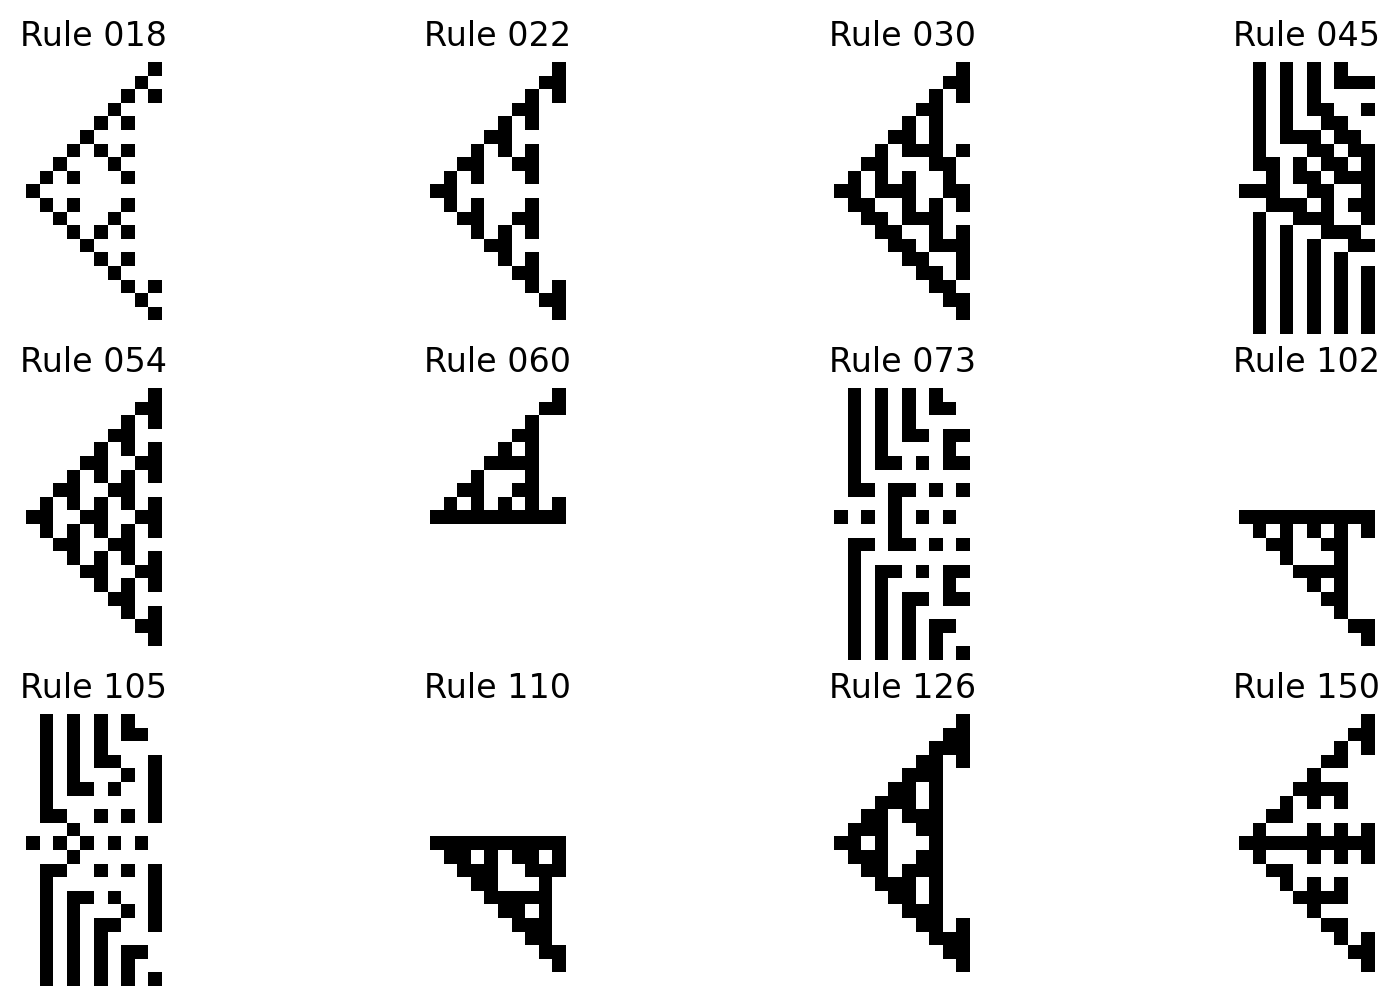

In [2]:
import matplotlib.pyplot as plt # our plotting library

width = 20
iterations = 10
initial_state = [0] * width
initial_state[width // 2] = 1
rules = [18, 22, 30, 45, 54, 60, 73, 102, 105, 110, 126, 150]
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(10, 6))  # Adjust the size and layout as needed
axs = axs.flatten() 
for i, rule in enumerate(rules):
    ca = dj.fractal.CellularAutomata(rule, width, initial_state)
    ca.plot(iterations, ax=axs[i], title='Rule '+ ca.rule_number, show_axis=False)  # Pass the specific subplot axis

My written explaination video lasted 1:13, so I wanted a piece with a length a little below that. We will create three tracks for a traditional minimal rock band with an electric guitar, an electric bass and a drum kit.

### Steps 1 and 2. Generate cellular automata and select strips

The first cellular automata will create piano rolls for the guitar and the bass. [Rule 150](http://atlas.wolfram.com/01/01/150/) seemed appropriate. A width of 200 cells will provide a good overview of the cellular automata. I inductively chose 136 steps after few iterations to obtain a musical piece a bit shorter than 1:13. For sake of initial state, I just took a one in the middle.

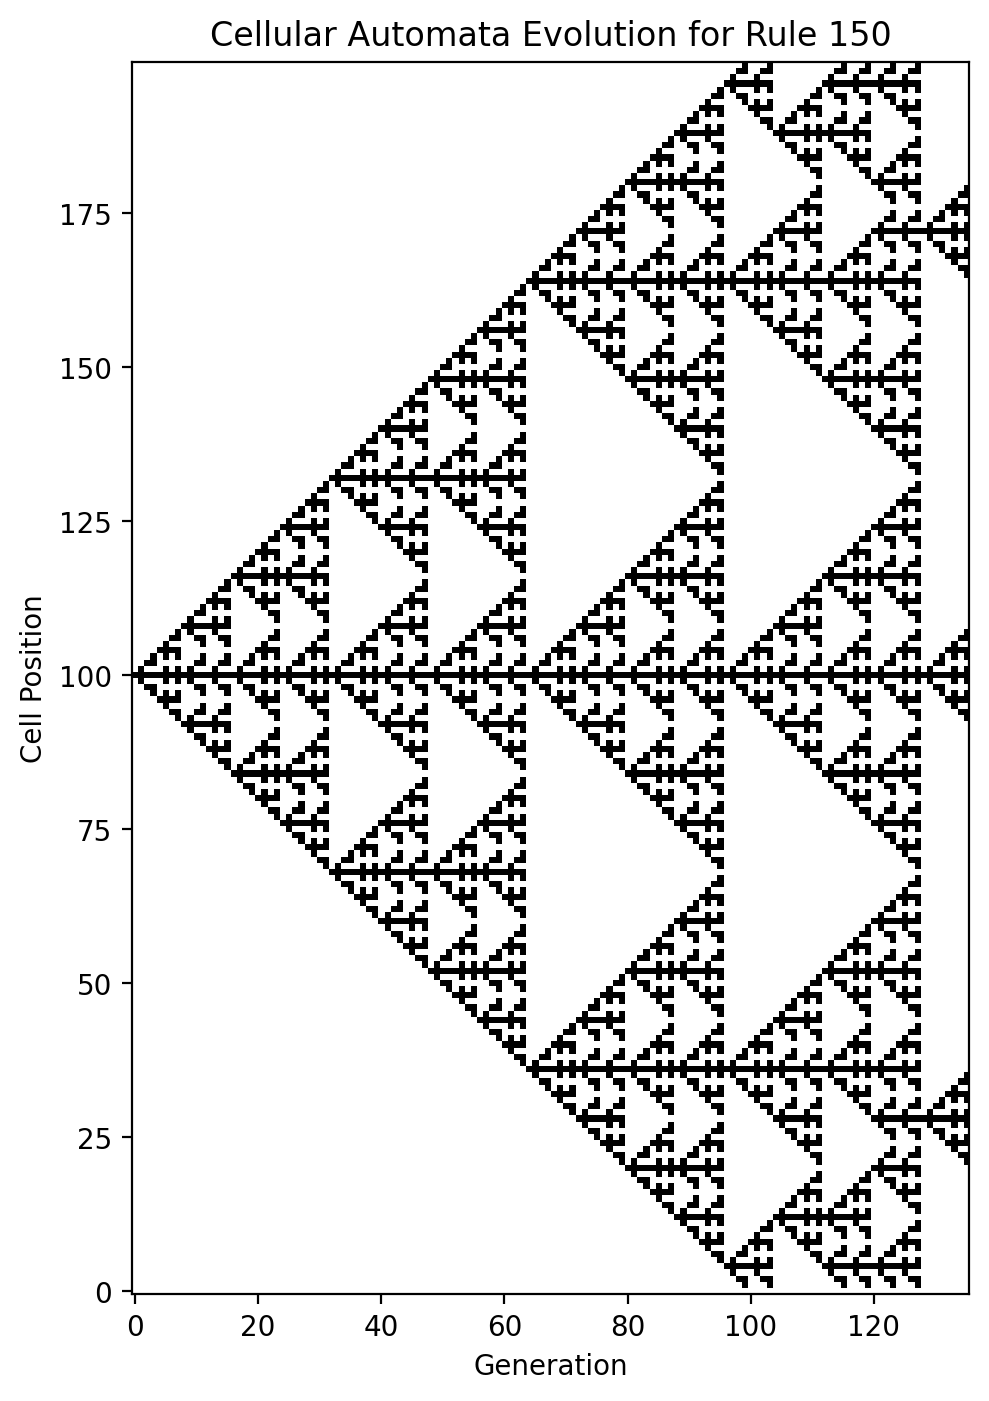

In [3]:
# Generate cells
ca1_rule = 150
width1 = 200
length1 = 136
init1 = [0] * width1
init1[width1 // 2] = 1
ca1 = dj.fractal.CellularAutomata(ca1_rule, width1, init1)
ca1.plot(iterations=length1);

From this plot, I selected two strips: a guitar line playing all along the piece, and bass to jump in a little later.

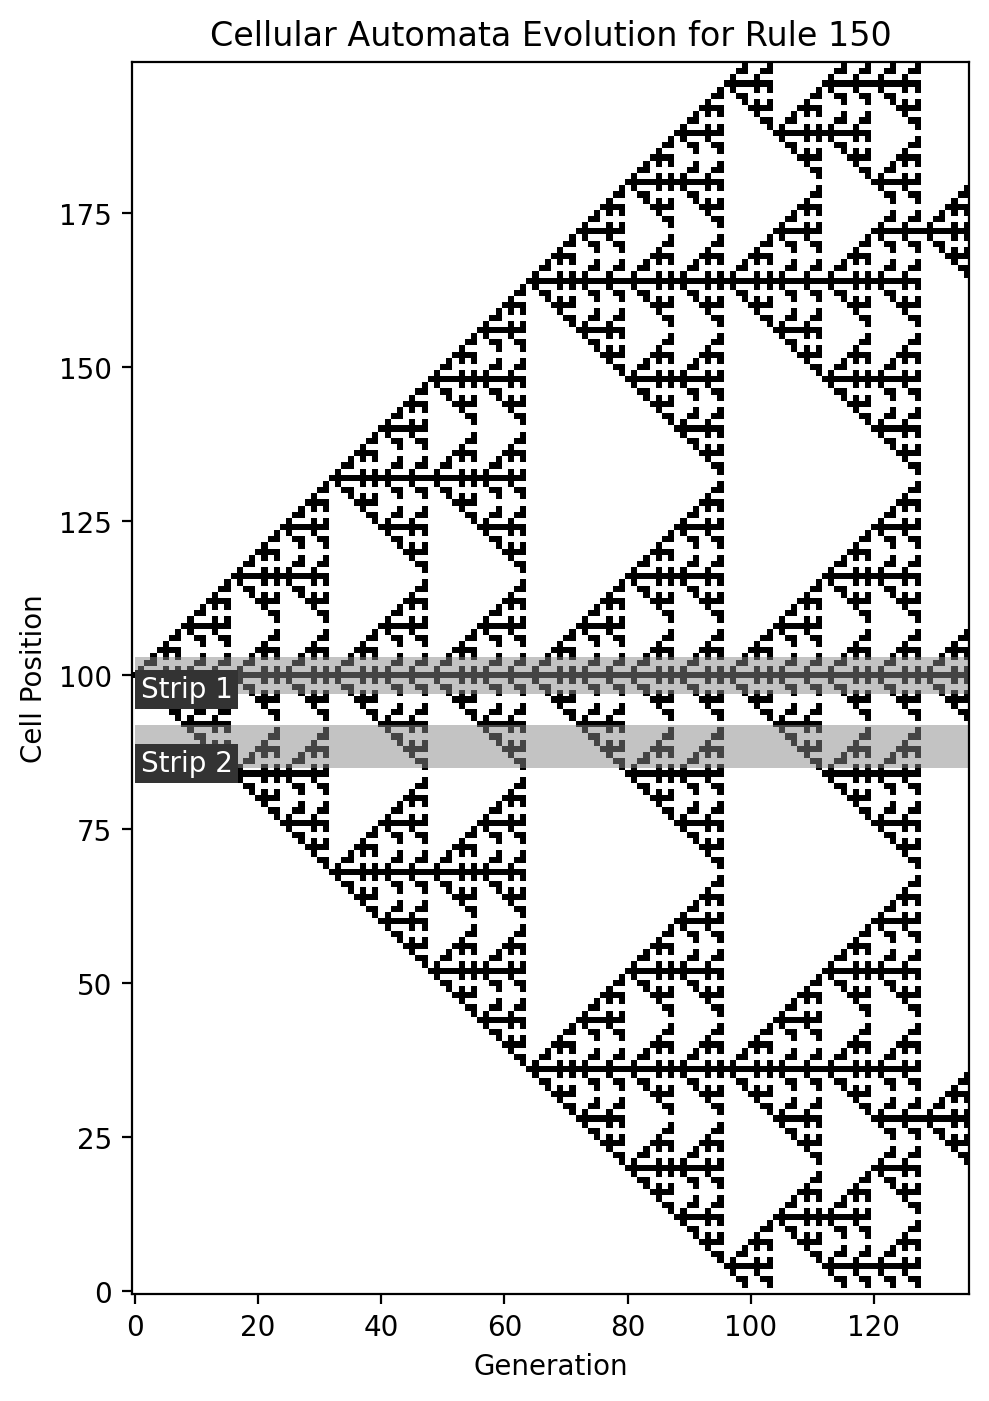

In [4]:
ca1_rule = 150
width1 = 200
length1 = 136
init1 = [0] * width1
init1[width1 // 2] = 1
ca1 = dj.fractal.CellularAutomata(ca1_rule, width1, init1)
strips1 = [(97, 103), (85, 92)]
ca1.plot(iterations=length1, strips=strips1);

The cellular automata process used for the guitar and the bass felt too dense with too much blank regions to generate good drumming. I tried a less dense rule set, with a random initial condition, then selected a region that allowed drums to kick in after a few beats in the piece.

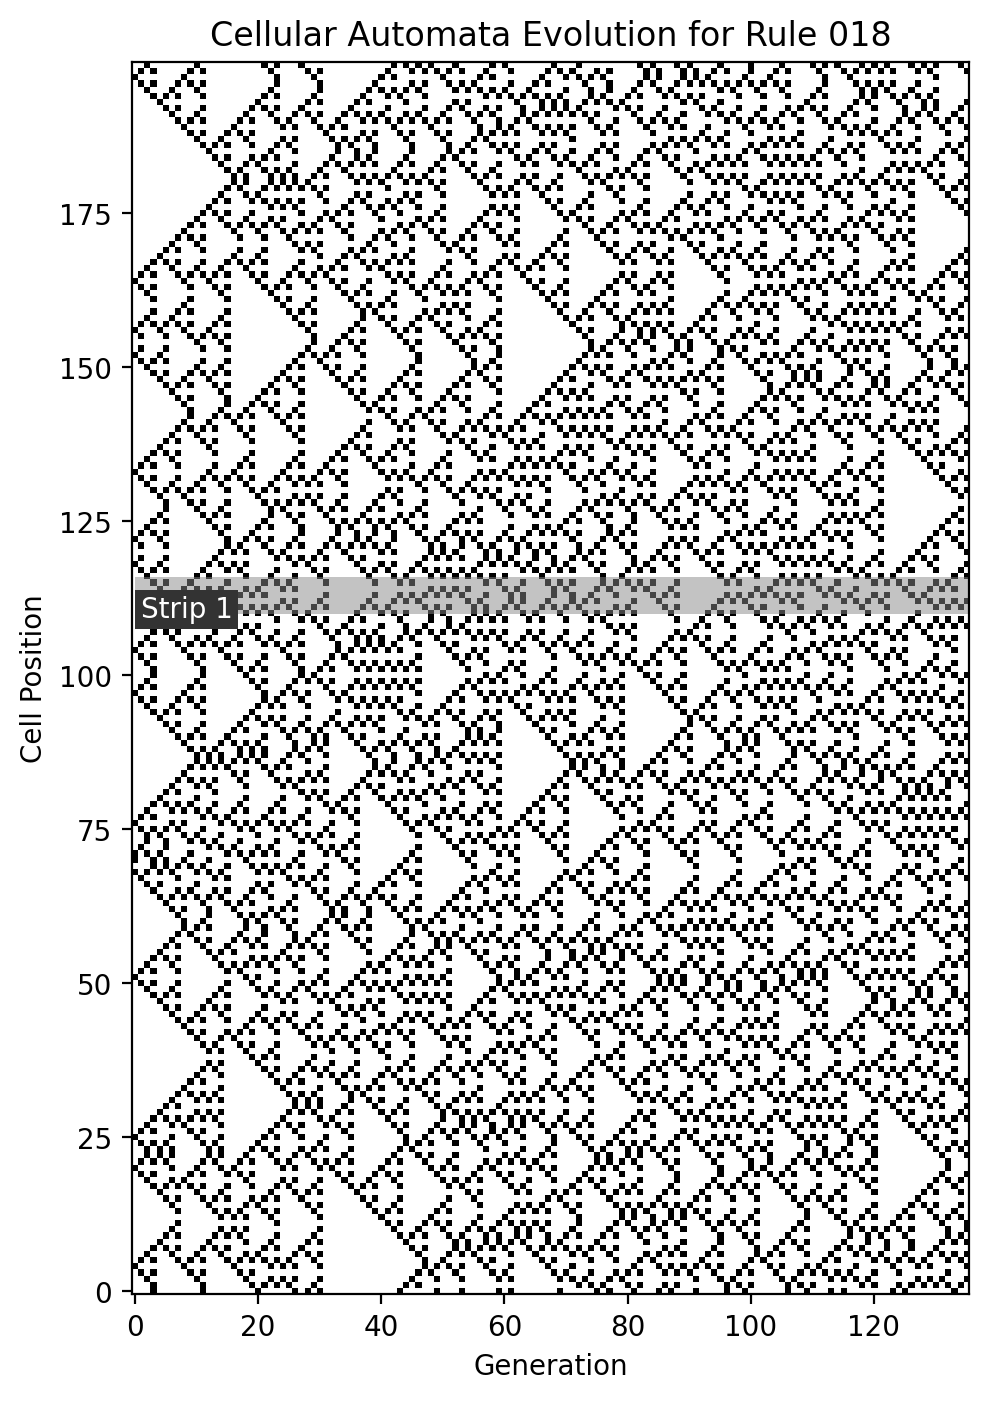

In [5]:
import random
random.seed(123)

ca2_rule = 18
width2 = 200
length2 = 136
init2 = [0] * width2
init2 = random.choices([0, 1], weights=[0.9, 0.1], k=width2)
ca2 = dj.fractal.CellularAutomata(ca2_rule, width2, init2)
#ca2.plot(iterations=length2);
strips2 = [(110, 116)]
ca2.plot(iterations=length2, strips=strips2);

We can narrow our cellular automata arrays with the `extract_strip` argument.

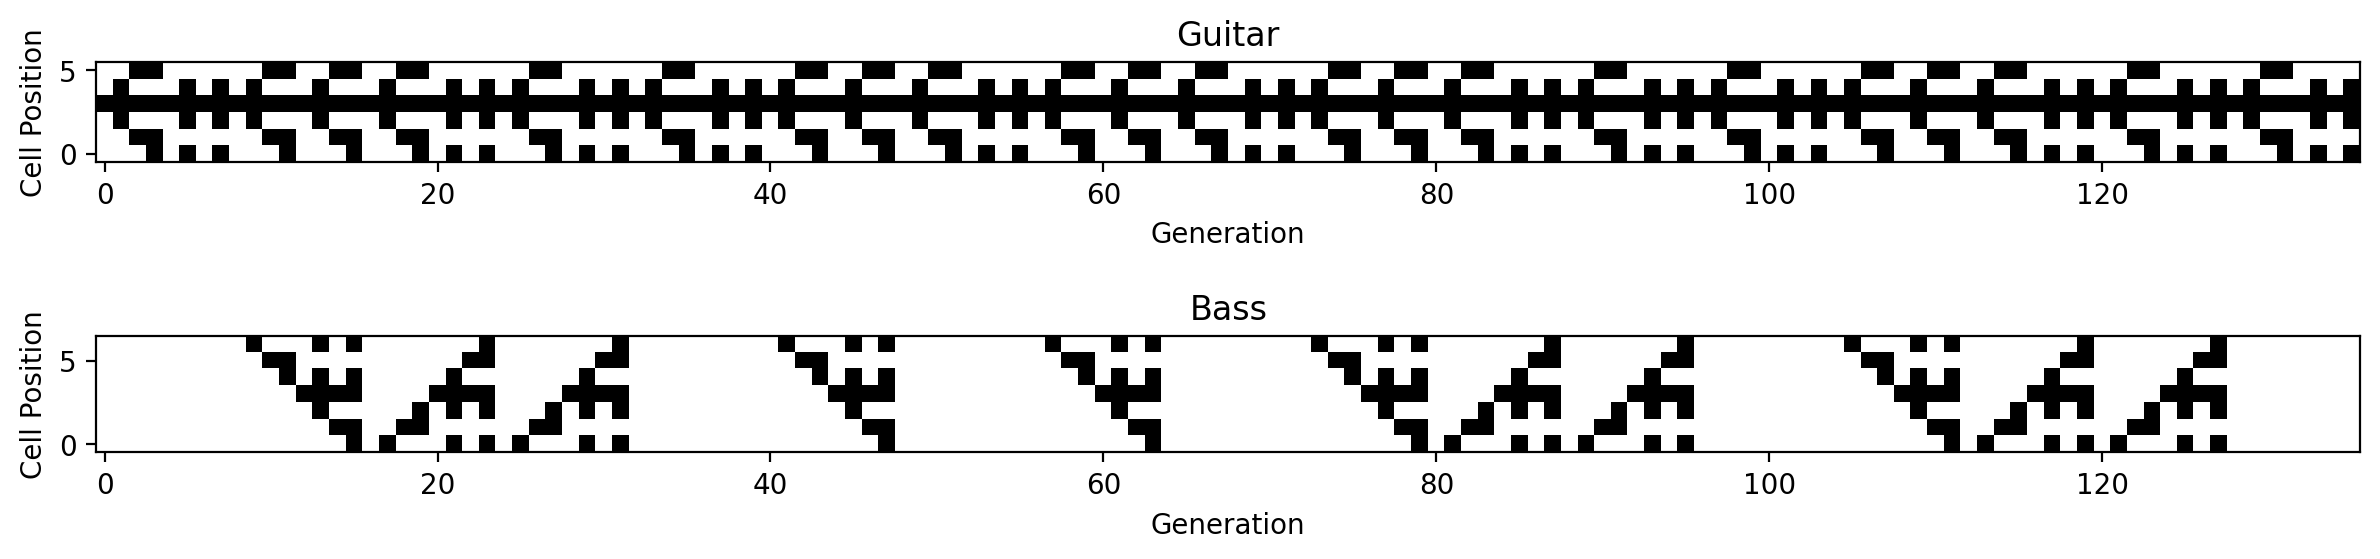

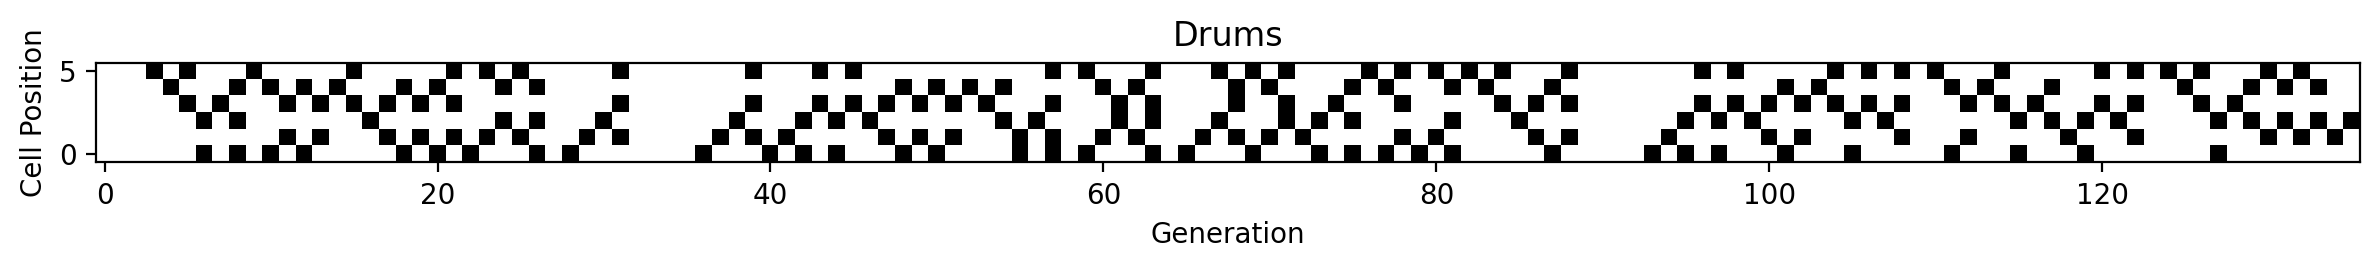

In [6]:
ca1.plot(iterations=length1, strips=strips1, title=['Guitar', 'Bass'], extract_strip=True);
ca2.plot(iterations=length2, strips=strips2, title=["Drums"], extract_strip=True);

### Step 3. Generate pitches

Until now, we just selected our strips visually. The `.generate()` method creates a sequence of numbers based on the strips, mapped on the `values` argument. We must trigger `.generate()` with arguments `iterations` for the length of the sequence, `strips` as used previously, and `values`, a list of dictionaries used for mapping. 

In our case, values are pitches. I used a C-minor scale (even for the drums, but it doesn't really matter), and durations sum to 8 to cover two 4/4 measures.

In [7]:
guitar_p_set = [dj.utils.cde_to_midi(p) for p in ['C4', 'D4', 'Eb4', 'F4', 'G4', 'Ab4', 'Bb4']]
bass_p_set = [dj.utils.cde_to_midi(p) for p in ['C3', 'D3', 'Eb3', 'F3', 'G3', 'Ab3', 'Bb3']]
drum_p_set = [dj.utils.cde_to_midi(p) for p in ['G3', 'Ab3', 'Bb3', 'C4', 'D4', 'Eb4', 'F4']]

The values in `.generate()` must be specified in dictionaries.

In [8]:
guitar_values = {}
for i, p in enumerate(guitar_p_set):
    guitar_values[i] = p

bass_values = {}
for i, p in enumerate(bass_p_set):
    bass_values[i] = p

drum_values = {}
for i, p in enumerate(drum_p_set):
    drum_values[i] = p

Our streams of pitches can now be generated.

In [9]:
guitar_p, bass_p = ca1.generate(length1, strips1, [guitar_values, bass_values])
drum_p = ca2.generate(length2, strips2, [drum_values])

### Step 4. Map pitches to notes

The `beatcycle` function zips cycling durations on the pitches to generate streams of notes with Djalgo's form (pitch, duration, offset).

In [10]:
guitar_n = dj.rhythm.beatcycle(pitches=guitar_p, durations=[0.5, 0.5, 1, 2, 1, 1, 0.5, 1.5])
bass_n = dj.rhythm.beatcycle(pitches=bass_p, durations=[1, 1, 2, 0.5, 0.5, 0.5, 0.5, 2])
drum_n = dj.rhythm.beatcycle(pitches=drum_p, durations=[2, 1, 1, 0.5, 0.5, 1, 1, 1])

To make the bass track sound right, we might preferred to pla ity one note at the time, not chords. We can iterate trhough the pitches and when comes a list, take the first element.

In [11]:
for i,n in enumerate(bass_n):
    if isinstance(n, list):
        bass_n[i] = n[0]

We glue the tracks together with the insert method so that the are played simultaneously.

In [12]:
piece_m21 = dj.conversion.convert([guitar_n, bass_n, drum_n], 'music21')
piece_m21.show('midi')
piece_m21.write('midi', '_midi-output/ca.mid')

'_midi-output/ca.mid'

By exporting our piece to a midi file, we can then import it in a DAW for further processing. I imported the file `ca.mid` in a DAW called Waveform, then mapped each track to Komplete start virtual instruments. Both Waveform and Komplete start can be used without cost and are covered by many tutorials online.

<iframe width="100%" height="200" scrolling="no" frameborder="no" allow="autoplay" src="https://w.soundcloud.com/player/?url=https%3A//api.soundcloud.com/tracks/1429599889&color=%23ff5500&auto_play=false&hide_related=false&show_comments=true&show_user=true&show_rateateeposts=false&show_teaser=true&visual=true"></iframe><div style="font-size: 10px; color: #cccccc;line-break: anywhere;word-break: normal;overflow: hidden;white-space: nowrap;text-overflow: ellipsis; font-family: Interstate,Lucida Grande,Lucida Sans Unicode,Lucida Sans,Garuda,Verdana,Tahoma,sans-serif;font-weight: 100;"><a href="https://soundcloud.com/user-512016957-418252282" title="motife" target="_blank" style="color: #cccccc; text-decoration: none;">motife</a> · <a href="https://soundcloud.com/user-512016957-418252282/t-cells-vogue" title="T-Cells vogue" target="_blank" style="color: #cccccc; text-decoration: none;">T-Cells vogue</a></div>

Because cellular automata generate repeating patterns, they perform nicely for rhythmic parts. However, they will fall short for melodies.

### Rotating CA

Another way of transforming cellular automata to music is to rotate the strips. We will use drum CA to create drums. In the following code block, I used three different rules initiated randomly for kick, snare and hit-hat. 

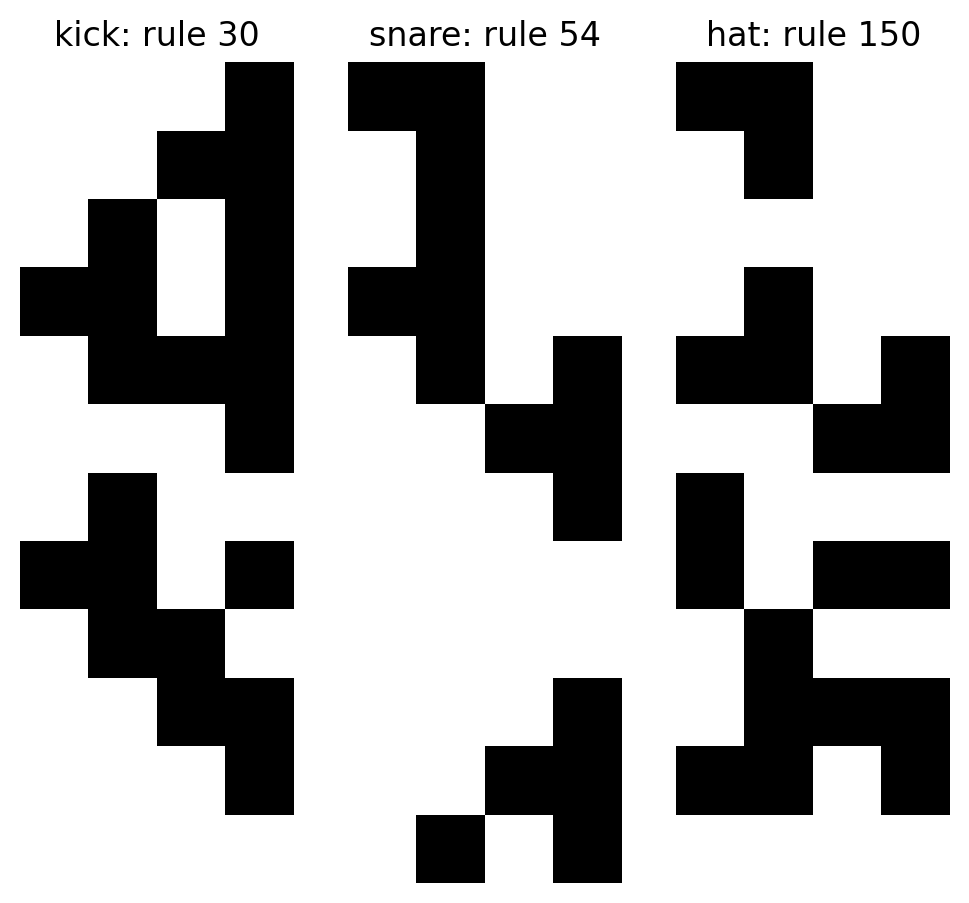

In [13]:
random.seed(123)

instruments = ['kick', 'snare', 'hat']
ca_drum_rule = [30, 54, 150]
drum_width = 12
drum_length = 4
drum_init = [0] * drum_width

ca_drum = {}
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(6, 6))
axs = axs.flatten()
for i in range(len(ca_drum_rule)):
    drum_init = random.choices([0, 1], weights=[0.75, 0.25], k=drum_width)
    ca_drum[instruments[i]] = dj.fractal.CellularAutomata(ca_drum_rule[i], drum_width, drum_init)
    ca_drum[instruments[i]].plot(drum_length, ax=axs[i], title=instruments[i] + ': rule '+ str(ca_drum_rule[i]), show_axis=False) 

Now instead of extracting a strip as we have done before, we can flatten the 0 and 1 array on the iteration (length) axis to generate a single line of 0 and 1 per instrument.

In [14]:
drum_01 = []
for key, value in ca_drum.items():
    drum_01i = value.generate_01(drum_length)
    drum_01i = np.array(drum_01i).flatten()
    drum_01.append(drum_01i)
    print(key, ':', drum_01i)

kick : [0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0
 1 1 0 1 0 1 1 1 1 1 1]
snare : [0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1
 1 1 0 0 1 1 1 0 0 0 0]
hat : [0 1 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0
 1 1 0 1 0 1 1 0 0 0 0]


In my instrument, a kick is pitch 36, a snare is pitch 38 and a hat is pitch 42. Each beat is of quarter length 1.

In [15]:
drum_p = [36, 38, 42]
drum_d = 1

We just have to inssert notes at the right offset to create Djalgo tracks, then convert to an exportable midi format, here Pretty-midi (to be installed with `!pip install pretty-midi`).

In [16]:
tracks = []
for i,drum in enumerate(drum_01):
    current_offset = 0
    track_i = []
    for hit in drum:
        if hit == 1:
            track_i.append((drum_p[i], drum_d, current_offset))
        current_offset += drum_d
    tracks.append(track_i)
dj.conversion.convert(tracks, 'pretty-midi').write('_midi-output/ca-drums.mid')

## Mandelbrot

You might already have seen the intriguing plot of the Mandelbrot ensemble. Djalgo implements a Mandelbrot fractal generator, which can creatively be used to generate musical patterns based on the fractal data.

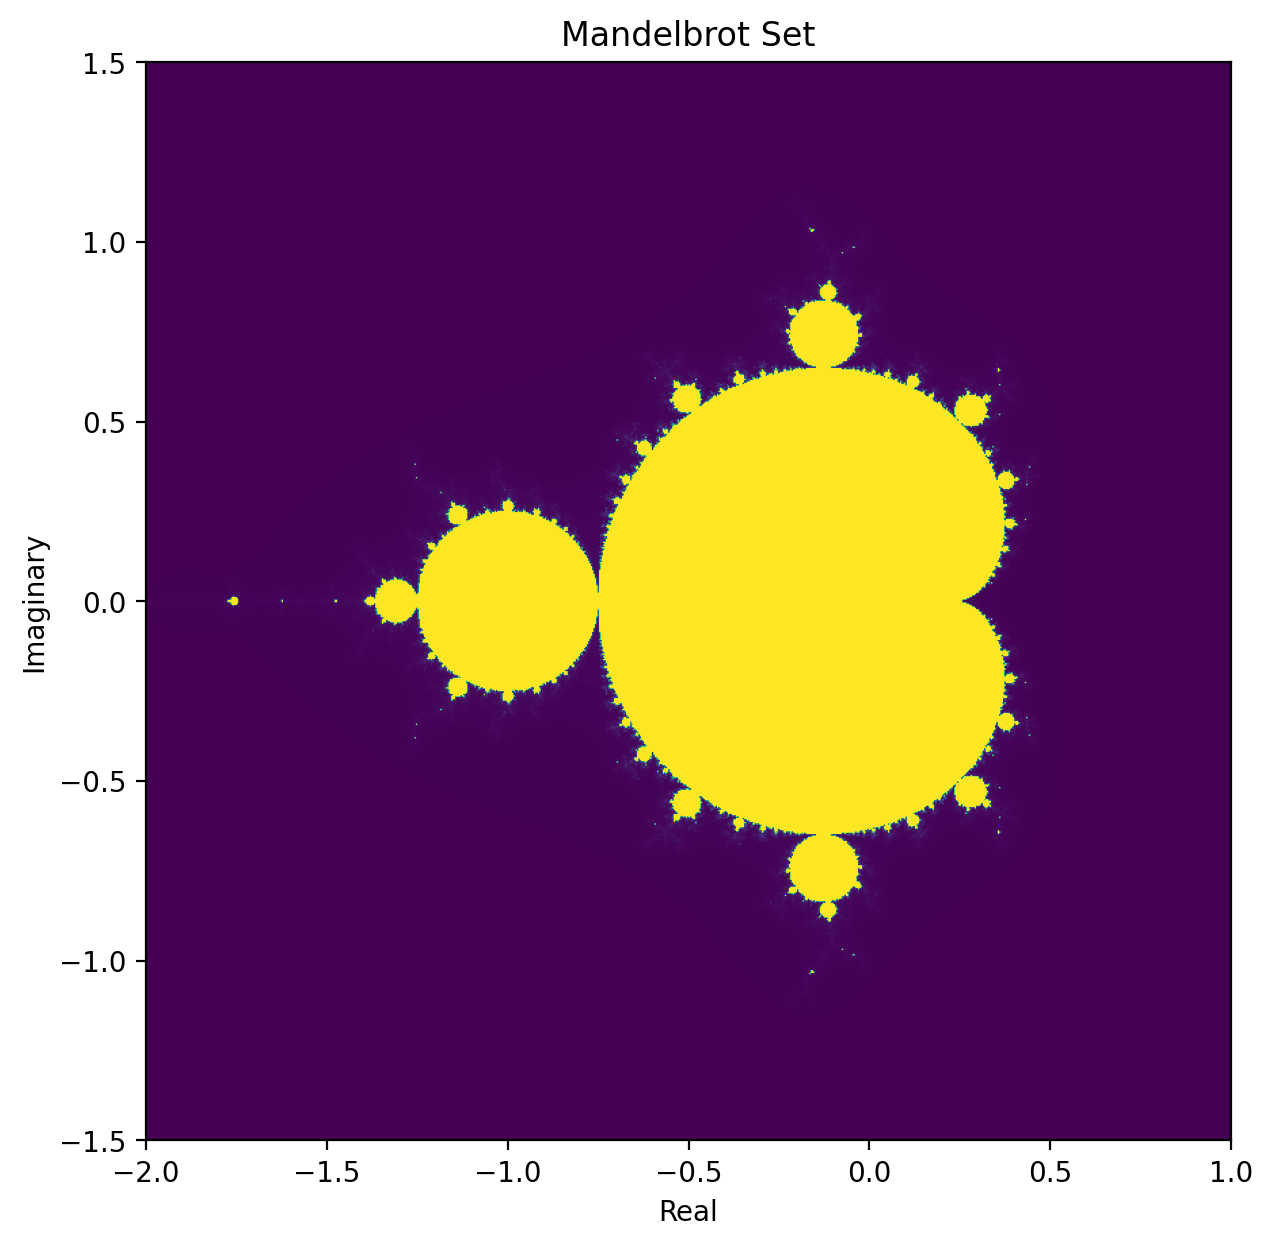

In [17]:
import djalgo as dj
dj.fractal.Mandelbrot().plot(figsize=(7, 7));

By zooming the plot, you can find unexplored regions.

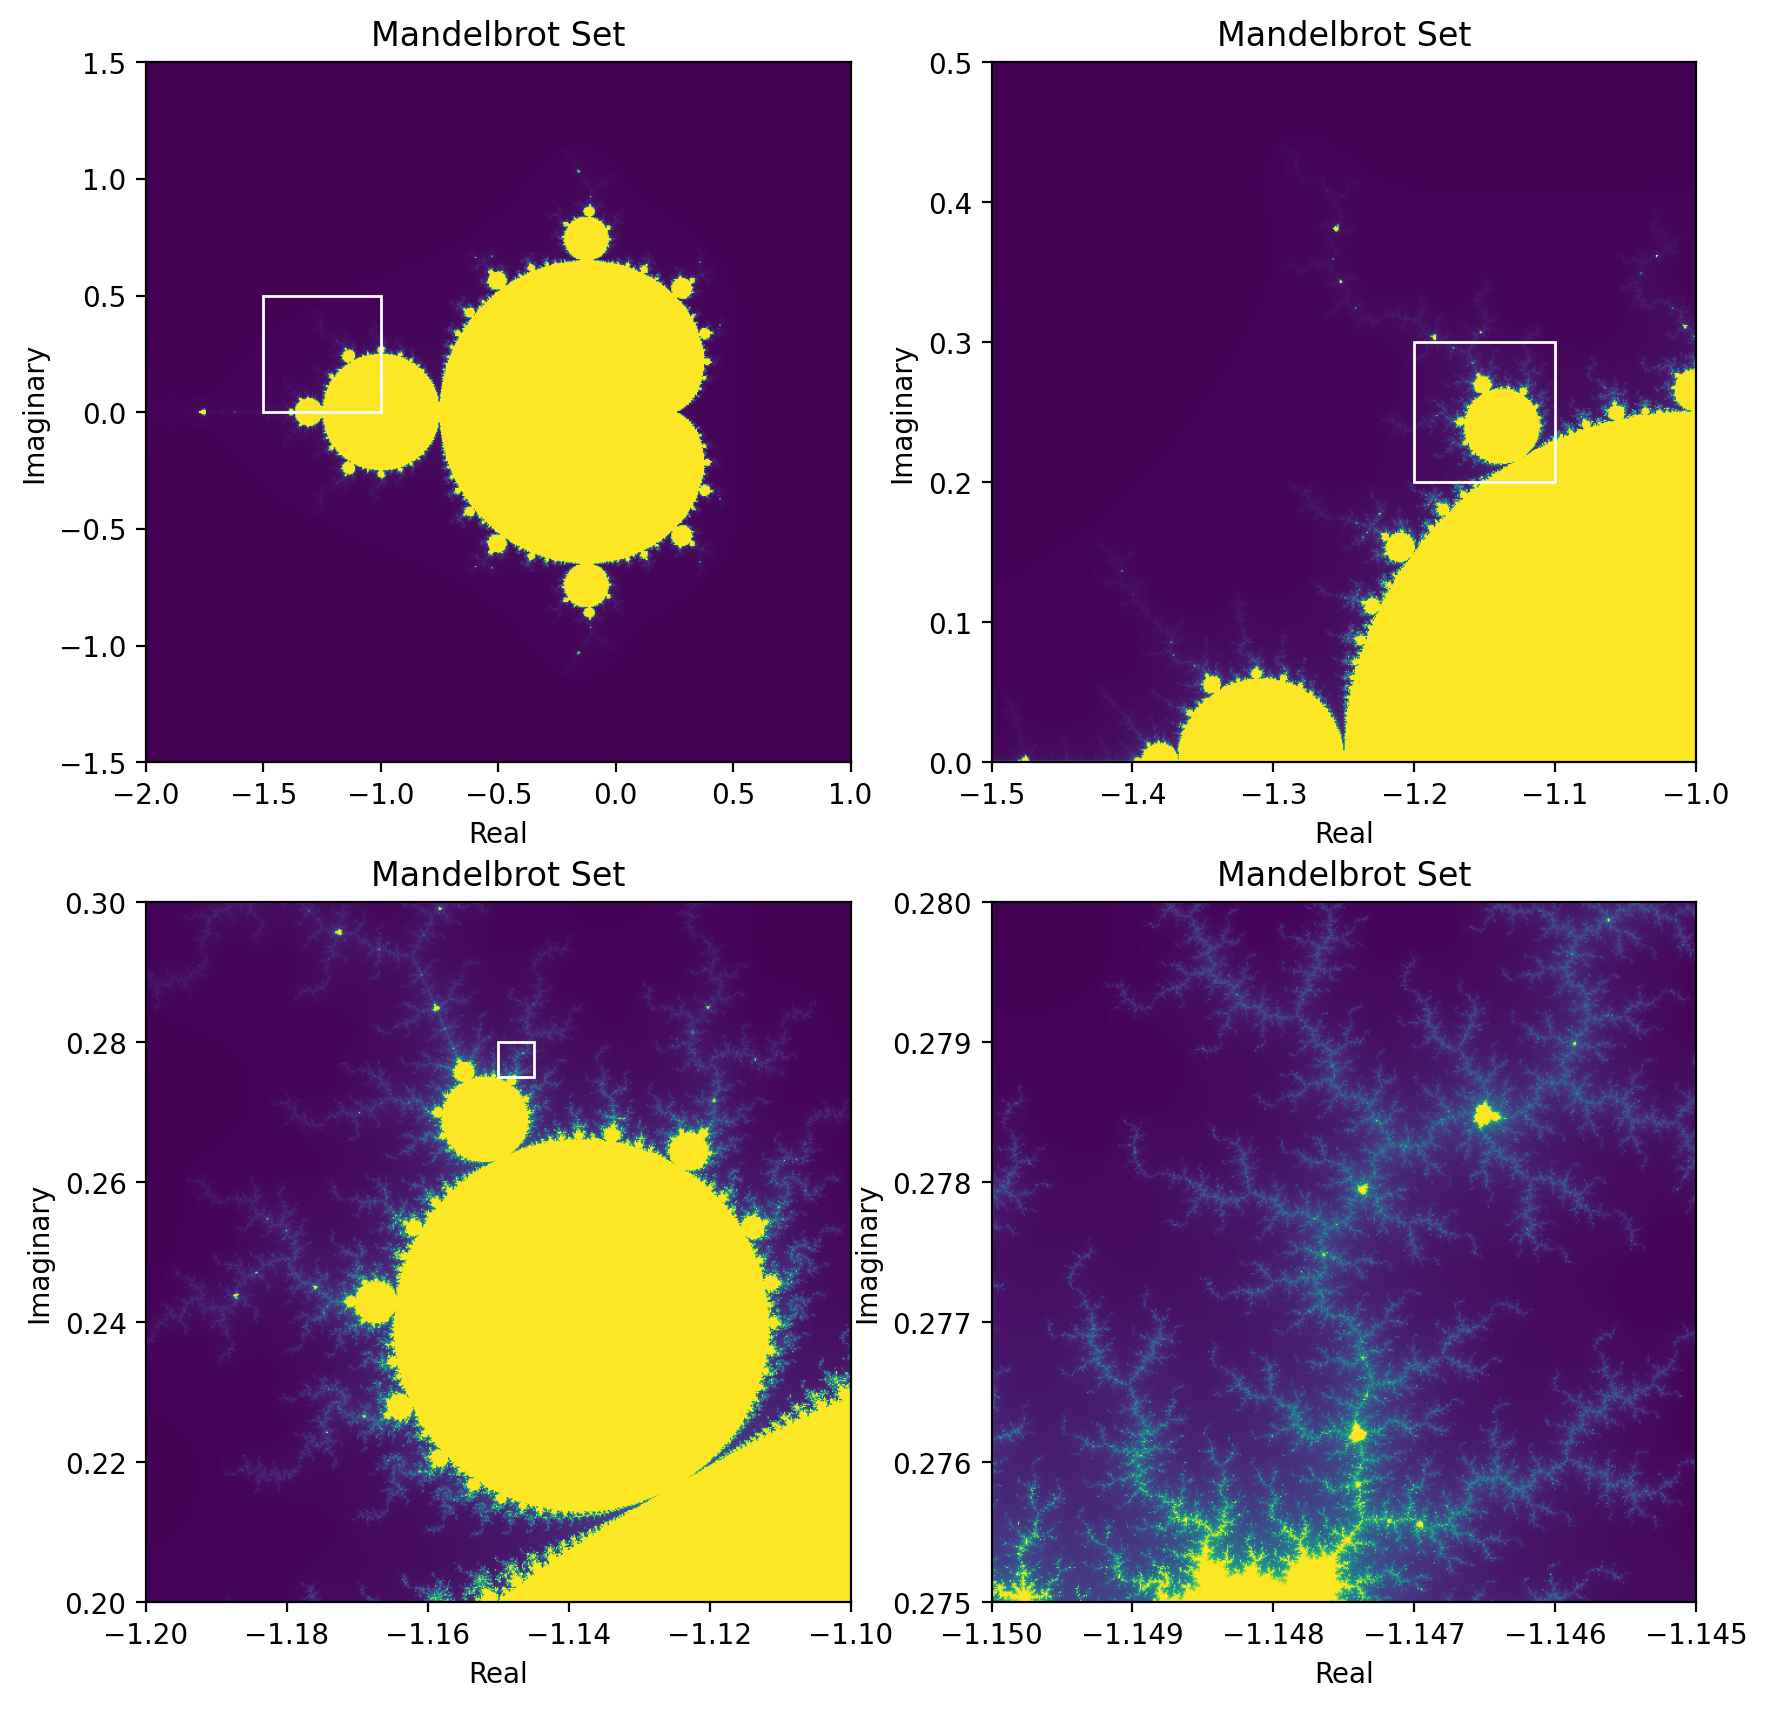

In [18]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.flatten()
ranges = [
    ((-2.0, 1.0), (-1.5, 1.5)),
    ((-1.5, -1.0), (0, 0.5)),
    ((-1.2, -1.1), (0.2, 0.3)),
    ((-1.150, -1.145), (0.275, 0.280))
]
for i, ((x_range, y_range), ax) in enumerate(zip(ranges, axs)):
    mandelbrot = dj.fractal.Mandelbrot(dimensions=(600, 600), max_iter=500, x_range=x_range, y_range=y_range)
    if i < (len(ranges)-1):
        mandelbrot.plot(ax=ax, zoom_rect=ranges[i+1])
    else:
        mandelbrot.plot(ax=ax)

By scanning the Mandelbrot matrix to subtract the numbers (horizontally, vertically or diagonally), you can generate a sequence of integers. The smaller value used for lenght pixelizes the last Mandelbrot plot to create a smaller matrix, since we need fewer values for a musical sequence. 

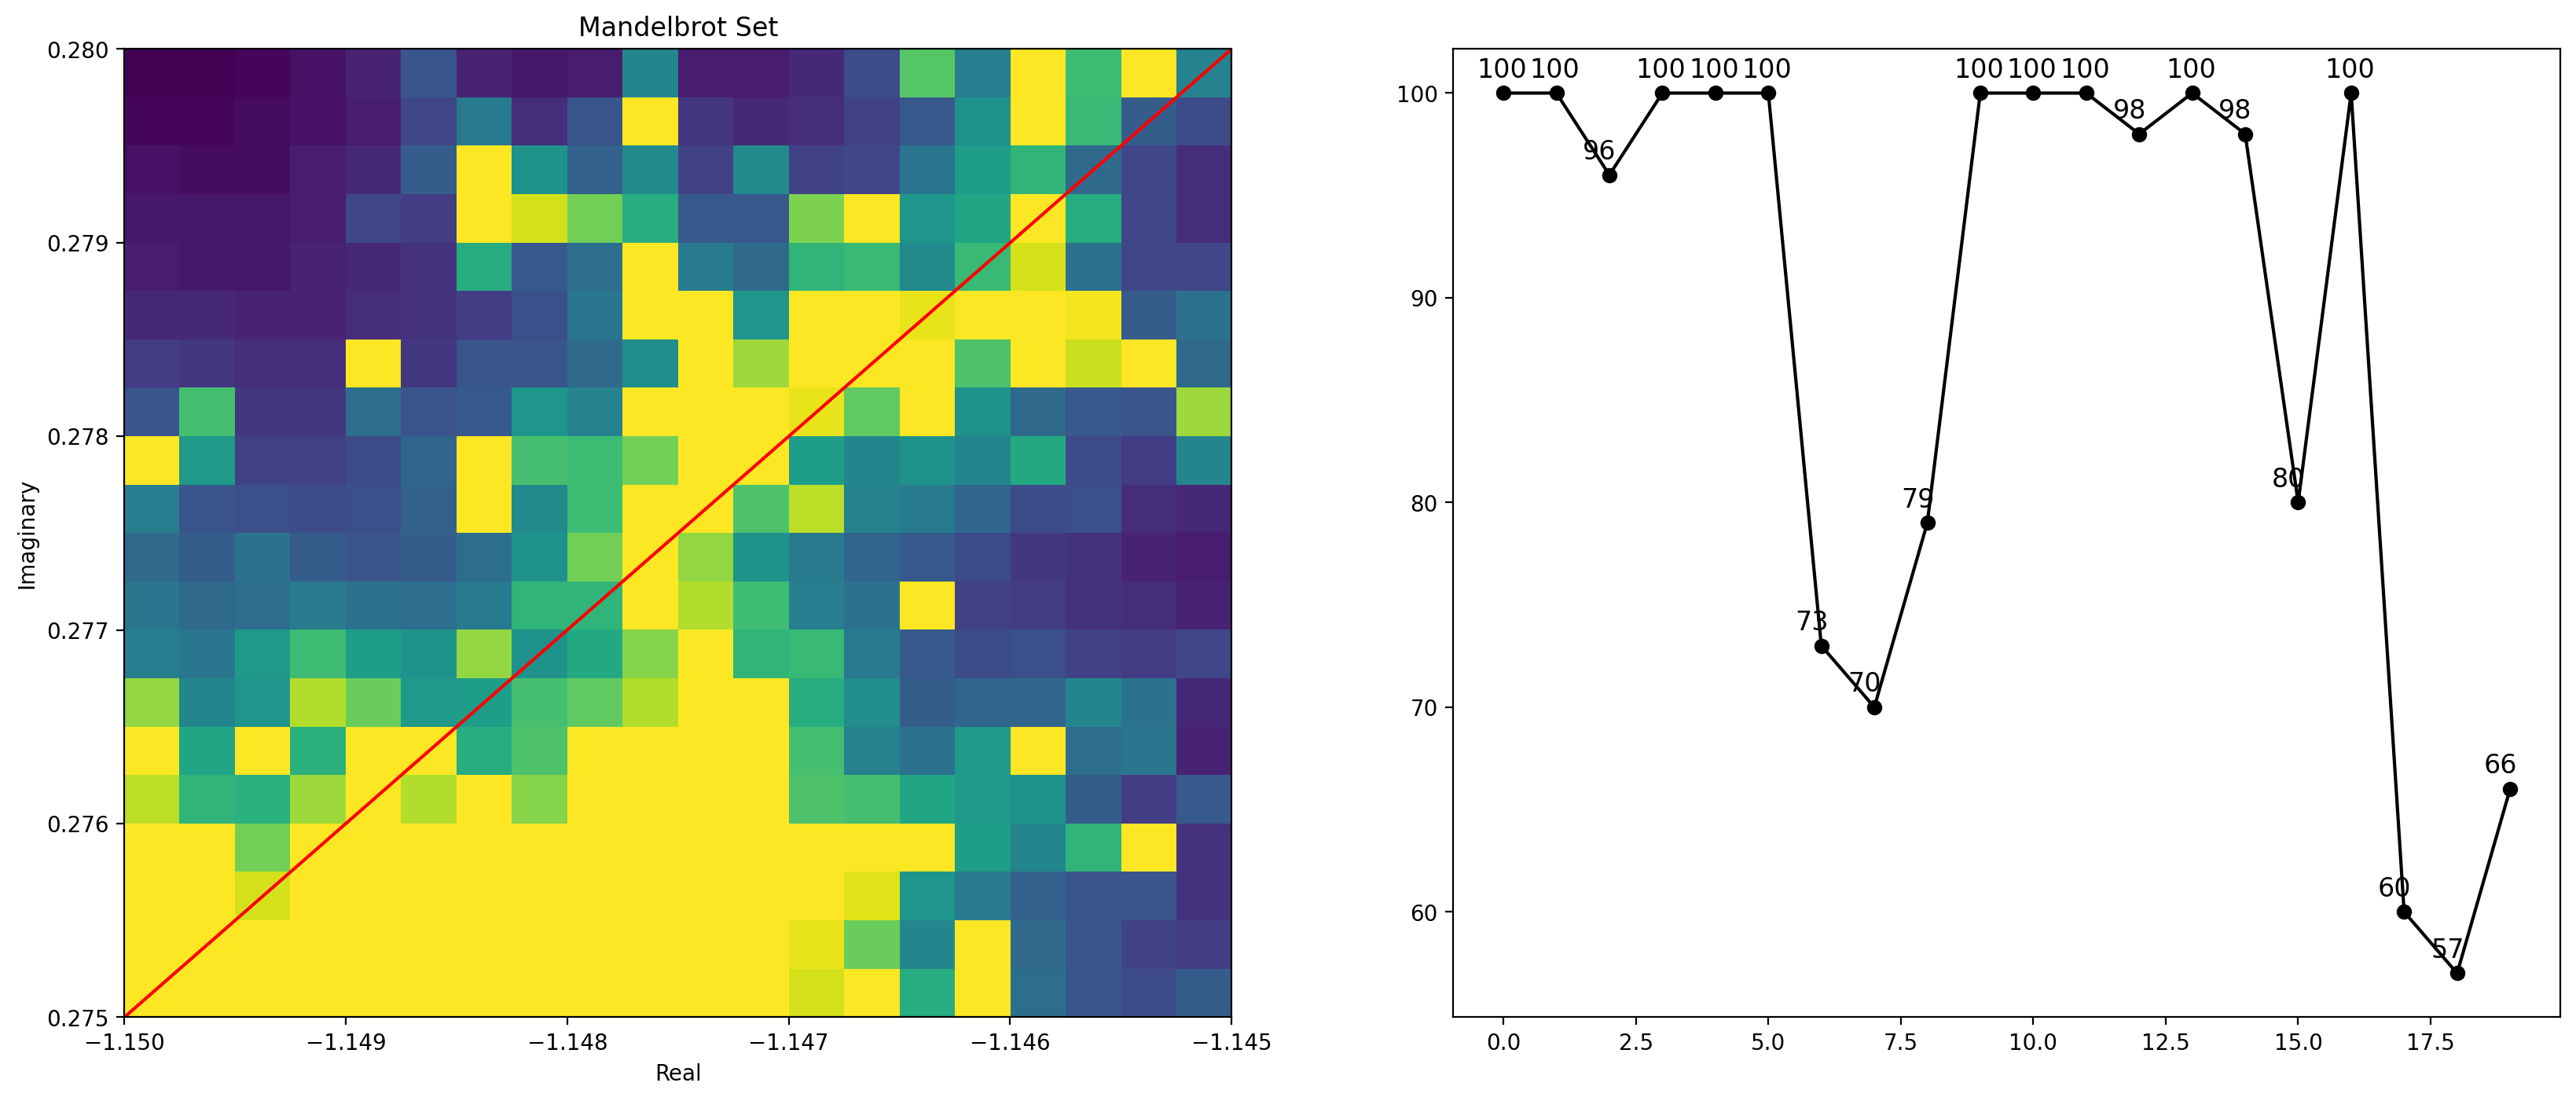

In [20]:
x_range, y_range = ranges[3]
length = 20
mandelbrot = dj.fractal.Mandelbrot(dimensions=length, max_iter=100, x_range=x_range, y_range=y_range)
mandelbrot_integers = mandelbrot.generate(method = 'diagonal-increasing')

fig, axs = plt.subplots(1, 2, figsize=(20, 8))
axs = axs.flatten()
# heatmap
mandelbrot.plot(ax=axs[0], show_numbers=False)
# increasing diagonal
axs[0].plot(x_range, y_range, color='red')

#numbers
axs[1].plot(range(length), mandelbrot_integers, '-o', color='black');
for i, m in enumerate(mandelbrot_integers):
    axs[1].text(i-0.5, m+0.5, str(m), fontsize=12, verticalalignment='bottom')


These numbers can be set as midi pitches, index on scales, etc. If you need a scale, make sure the indexes are included in the scale. You can scale them to range between index 0 and index 20.

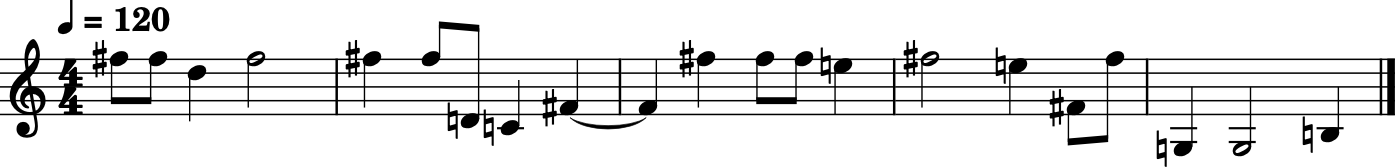

In [21]:
import numpy as np
g_major = dj.harmony.Scale(tonic='G', mode='major').generate()[32:53]
mandelbrot_index = [int(i) for i in dj.utils.scale_list(mandelbrot_integers, 0, 13)]
mandelbrot_p = [g_major[i] for i in mandelbrot_index]
mandelbrot_n = dj.rhythm.beatcycle(pitches=mandelbrot_p, durations=[0.5, 0.5, 1, 2, 1])
mandelbrot_m21 = dj.conversion.convert(mandelbrot_n, 'music21')
mandelbrot_m21.show()
mandelbrot_m21.show('midi')

## Logistic map

The logistic map comes from the logistic growth equation, which in turn comes from the concept population growth. Disregarding limitations from the environment, a population $🐇$ of a reproducing species will grow at a certain $r$ rate.

$$
🐇_{t+1} = r \times 🐇_t
$$

That means that population $x$ at the next step depends on population $x$ at the current step times a growth rate, expressed in proprotion of the population per step.

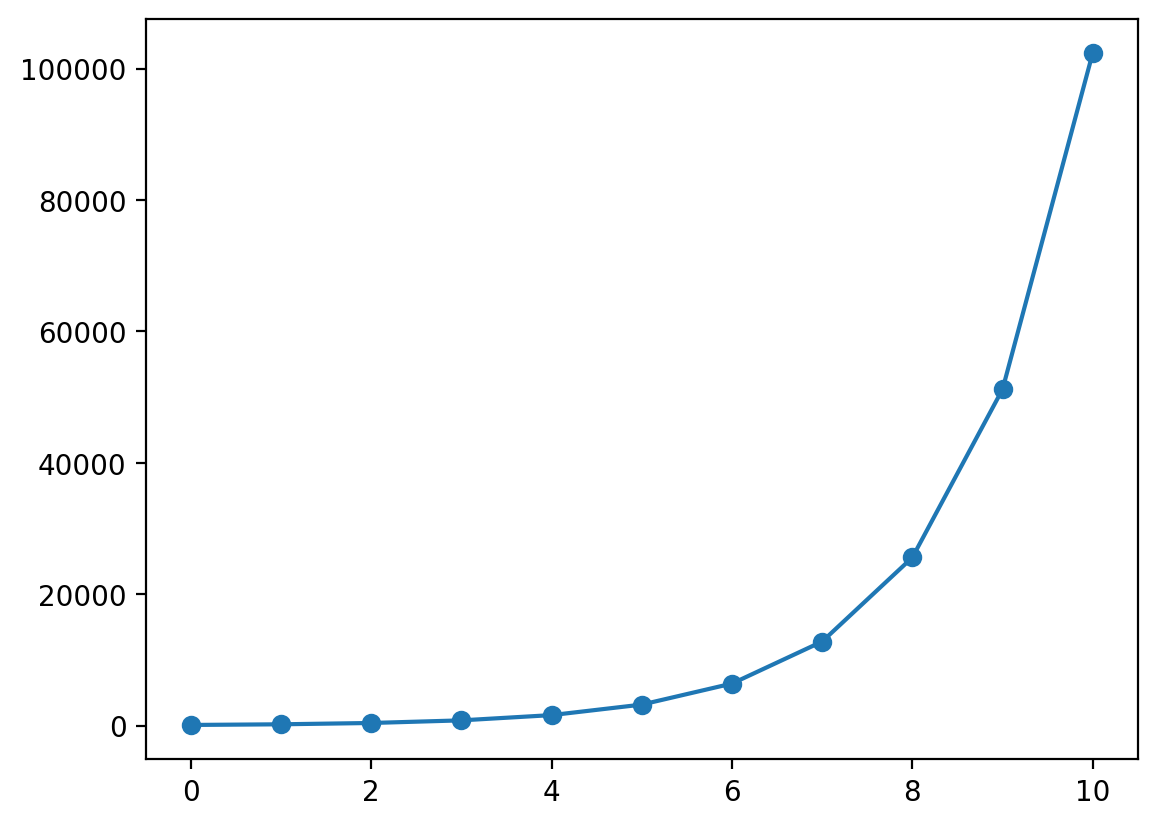

In [22]:
def growth(x, r):
    return r * x # simple exponential growth

initial_population = 100
population = [initial_population]
generations = 10
growth_rate = 2 # population doubles each generation
for i in range(generations):
    population.append(growth(population[i], growth_rate))

plt.plot(range(generations+1), population, '-o');

The growth is exponential. The more the population, the more it reproduces. But populations never grows to infinite. There are always limits to population growth. We might want to decrease the growth rate over time. Or, a better way to think of it would be to decrease the growth rate according to the population: the more the population, the less the growth rate. Let's call it the limit of the environment $limit$. This is where the logistic equation is useful.

$$
🐇_{t+1} = r \times 🐇_t \times \frac{(limit - 🐇_t)}{limit}
$$

When $🐇_t$ comes close to the $limit$, the term $\frac{(limit - 🐇_t)}{limit}$ comes close to zero.

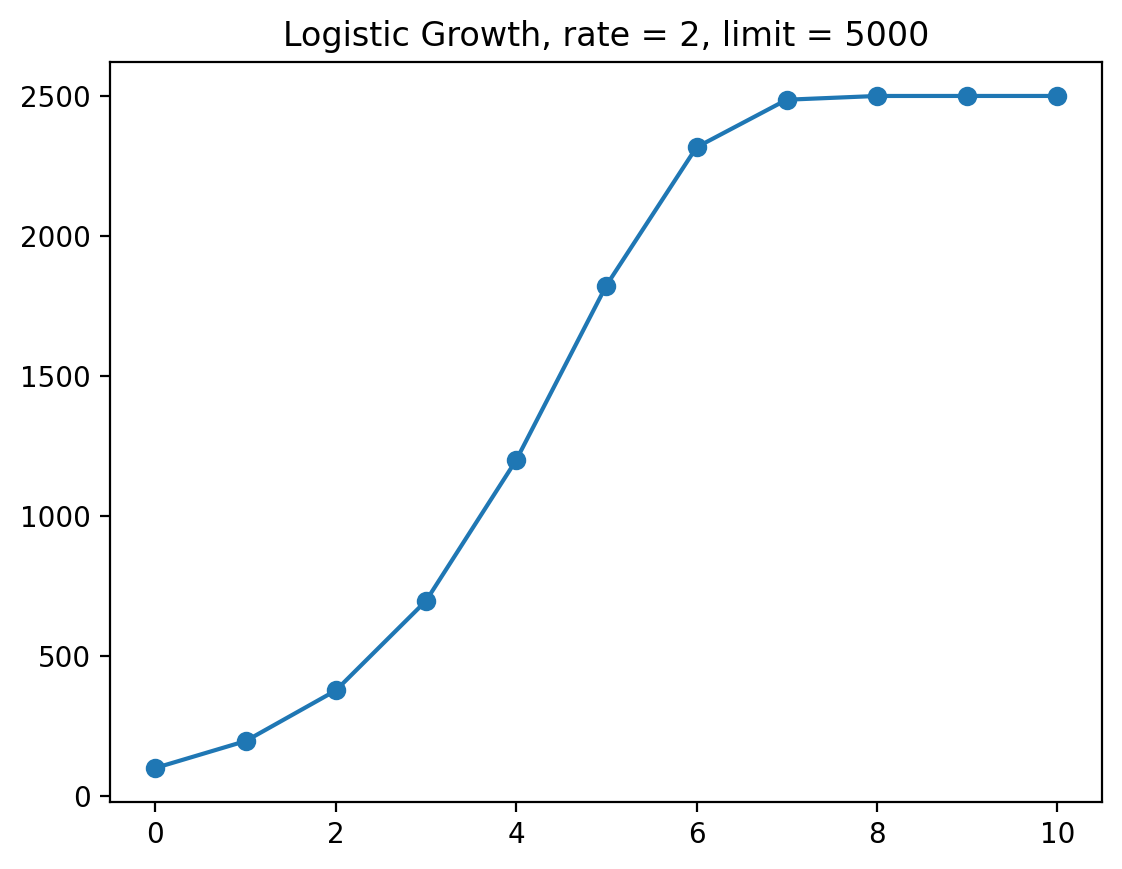

In [23]:
def logistic_growth(x, r, limit):
    return r * x * (limit-x)/limit # logistic growth

initial_population = 100
population = [initial_population]
generations = 10
growth_rate = 2
limit = 5000
for i in range(generations):
    population.append(logistic_growth(population[i], growth_rate, limit))

plt.plot(range(generations+1), population, '-o')
plt.title(f'Logistic Growth, rate = {growth_rate}, limit = {limit}');

You might have remarked that the population never reaches 5000, but only half of it. Thats because the growth rate is decreased so much that population can't reach the maximum allowed. Let's see what happens with different growth rates.

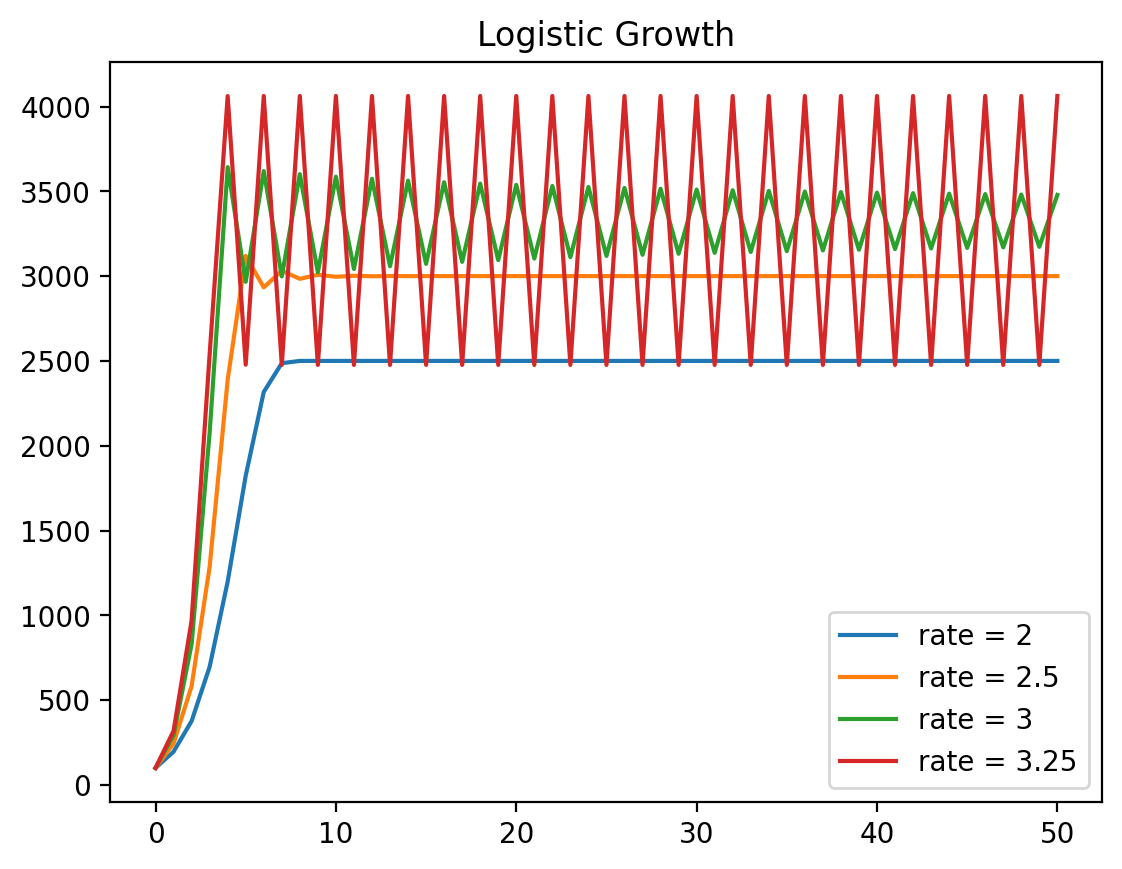

In [24]:
growth_rates = [2, 2.5, 3, 3.25]
initial_population = 100
limit = 5000
generations = 50
for r in growth_rates:
    population = [initial_population]
    for i in range(generations):
        population.append(logistic_growth(population[i], r, limit))
    plt.plot(range(generations+1), population, label=f'rate = {r}')
plt.legend()
plt.title(f'Logistic Growth');

When growth rate increases, an oscillating convergence to a stabilized value occurs, and this value depends on the growth rate.. If we focus our interest on this stabilized value depending on growth rates, we get a very intriguing pattern.

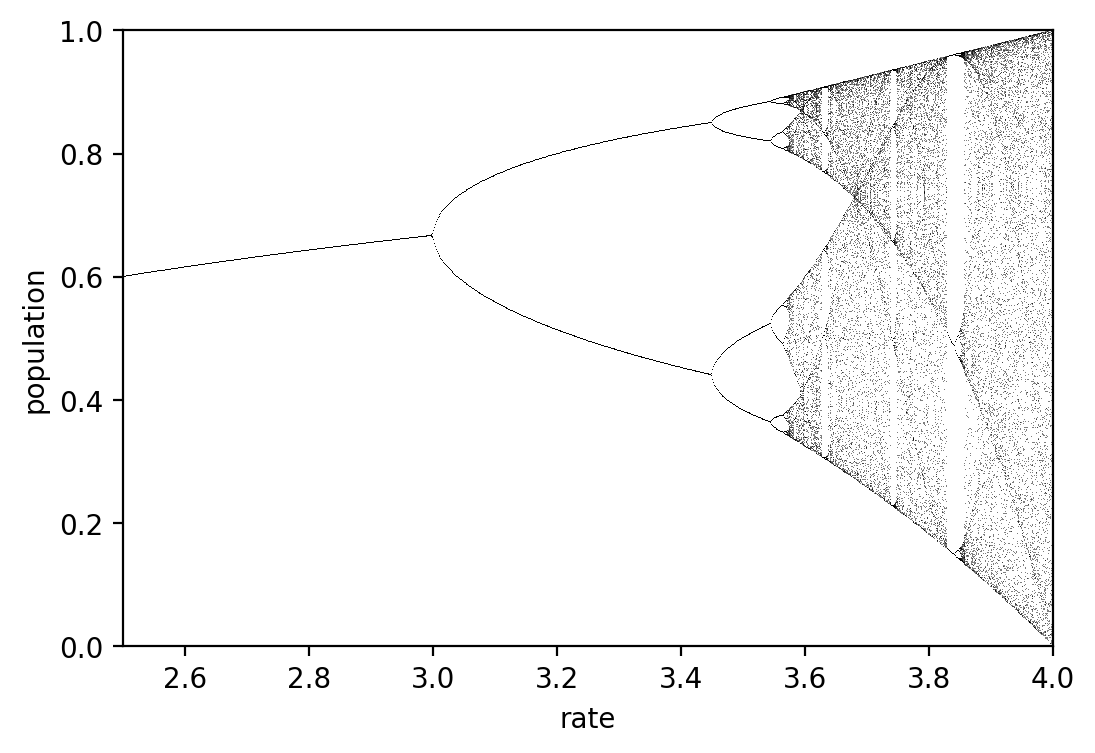

In [25]:
lm = dj.fractal.LogisticMap(rates=np.linspace(2.5, 4, 1000), iterations=1000, last_n=100)
lm.plot(figsize=(6, 4));

An explaination of this behaviour can be find on the Veritasium YouTube channel.

<iframe width="560" height="315" src="https://www.youtube.com/embed/ovJcsL7vyrk?si=EQoJddVSfTCDMeox" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

The logistic map can be used to create notes. Here, we lower the resolution to create a list of pitches.

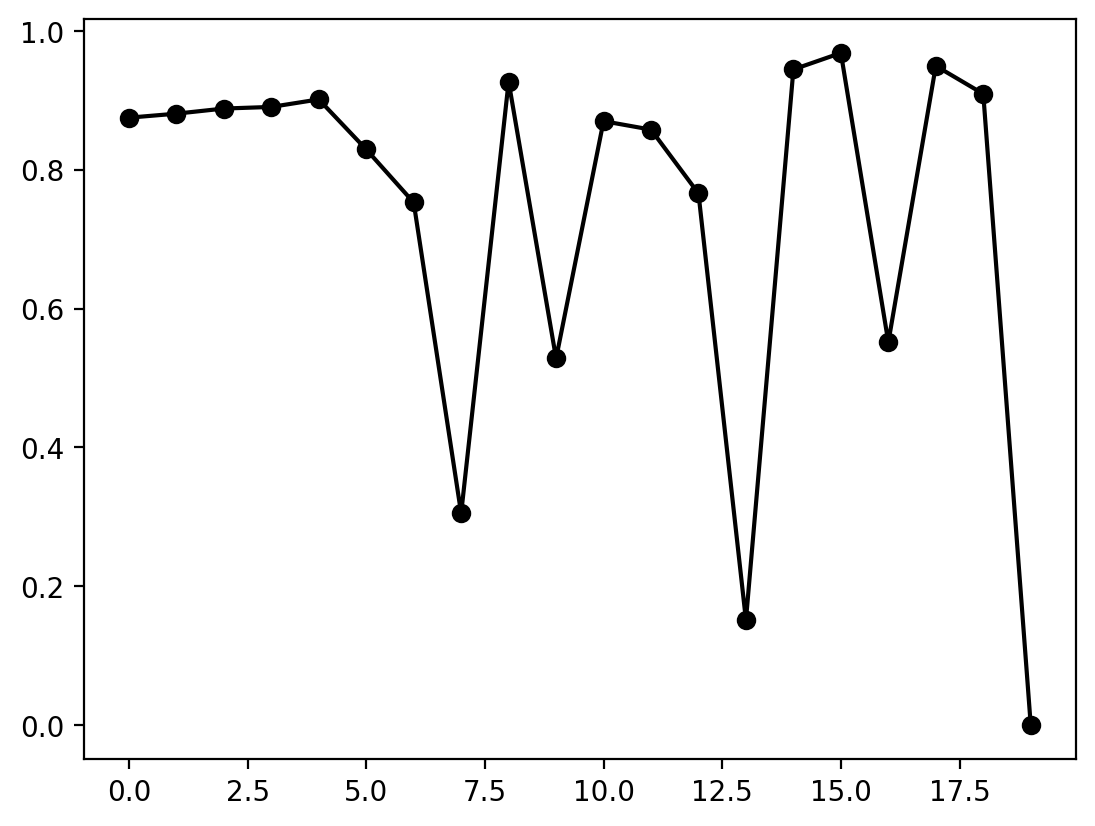

In [26]:
length = 20
lm = dj.fractal.LogisticMap(rates=np.linspace(3.5, 4, length), iterations=1000, last_n=1)
_, lm_values = lm.generate()
plt.plot(range(length), lm_values, '-o', color='black');

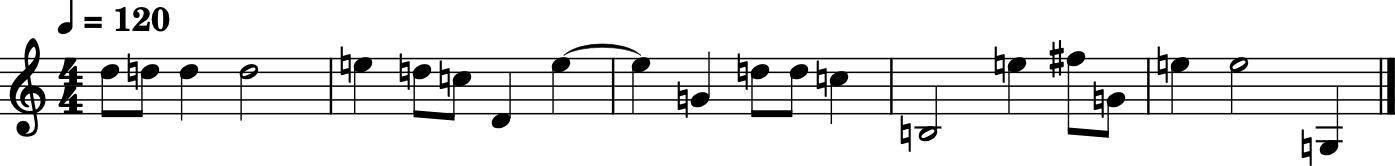

In [27]:
lm_index = [int(i) for i in dj.utils.scale_list(lm_values, 0, 13)]
lm_p = [g_major[i] for i in lm_index]
lm_n = dj.rhythm.beatcycle(pitches=lm_p, durations=[0.5, 0.5, 1, 2, 1])
lm_m21 = dj.conversion.convert(lm_n, 'music21')
lm_m21.show()
lm_m21.show('midi')

↳ [Genetic algorithms](07_genetic.html)